In [1]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt


# Konfigurationen 
FILE_PATH = "/Users/titusthamm/Library/Mobile Documents/com~apple~CloudDocs/Masterstudium/3. Semester/Praktikum/2. Assignment/BPI_SIMULATION/BPI Challenge 2017.xes"

In [2]:
log_df = pm4py.read_xes(FILE_PATH)
print(log_df.shape)

/Users/titusthamm/Library/Mobile Documents/com~apple~CloudDocs/Masterstudium/3. Semester/Praktikum/1. Assignment/.venv/lib/python3.13/site-packages/pm4py/utils.py:991: UserWarning: Install the optional requirement `rustxes` to import/export files faster.
  warnings.warn("Install the optional requirement `rustxes` to import/export files faster.")
/Users/titusthamm/Library/Mobile Documents/com~apple~CloudDocs/Masterstudium/3. Semester/Praktikum/1. Assignment/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 31509/31509 [00:17<00:00, 1834.47it/s]


(1202267, 19)


In [3]:
print(log_df.columns)

Index(['Action', 'org:resource', 'concept:name', 'EventOrigin', 'EventID',
       'lifecycle:transition', 'time:timestamp', 'case:LoanGoal',
       'case:ApplicationType', 'case:concept:name', 'case:RequestedAmount',
       'FirstWithdrawalAmount', 'NumberOfTerms', 'Accepted', 'MonthlyCost',
       'Selected', 'CreditScore', 'OfferedAmount', 'OfferID'],
      dtype='object')


In [4]:
df = pm4py.convert_to_dataframe(log_df)

In [5]:
df.head()

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#get the start event A_Create Application
arrivals = df[df['concept:name'] == 'A_Create Application'].copy()

# sorting it chronologically as we need the times between two neighboured instances
arrivals = arrivals.sort_values(by='time:timestamp')

# time differences between the preceeding and current trace
arrivals['inter_arrival_time'] = arrivals['time:timestamp'].diff()

# convert to Seconds
arrivals['seconds_gap'] = arrivals['inter_arrival_time'].dt.total_seconds()

# Drop the first row as it has no previous row
arrivals = arrivals.dropna(subset=['seconds_gap'])

# calculate mean and lambda for exponential distribution
mean_gap = arrivals['seconds_gap'].mean()
lambda_rate = 1 / mean_gap

print(f"Simulation Parameter (Mean Gap): {mean_gap:.2f} seconds")
print(f"Simulation Parameter (Lambda):   {lambda_rate:.6f} arrivals per second")

Simulation Parameter (Mean Gap): 1002.23 seconds
Simulation Parameter (Lambda):   0.000998 arrivals per second


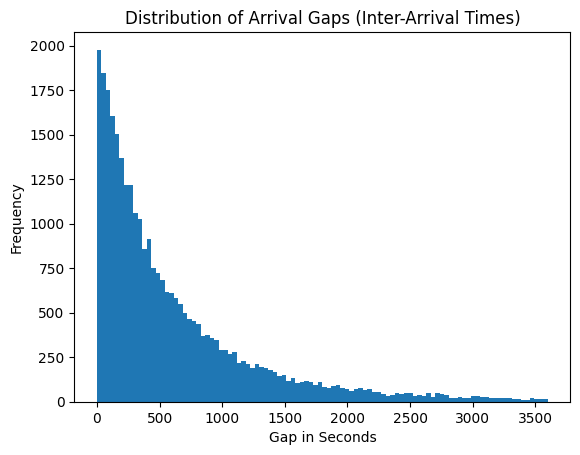

In [7]:
plt.hist(arrivals['seconds_gap'], bins=100, range=(0, 3600)) # Inspecting gaps up to 1 hour
plt.title("Distribution of Arrival Gaps (Inter-Arrival Times)")
plt.xlabel("Gap in Seconds")
plt.ylabel("Frequency")
plt.show()

In [8]:
###Testing the spawning with the exponential distribution

import random

def get_next_interarrival_time():
    return random.expovariate(lambda_rate)

current_sim_time = 0
simulation_duration = 86400  #1 day in seconds

print(f"--- Simulation Started with Mean Gap: {mean_gap}s ---")

while current_sim_time < simulation_duration:
    print(f"Time {current_sim_time:.2f}: Spawning new Loan Application")
    wait_time = get_next_interarrival_time()
    current_sim_time += wait_time

print("--- Simulation Ended ---")

--- Simulation Started with Mean Gap: 1002.2342869112606s ---
Time 0.00: Spawning new Loan Application
Time 845.65: Spawning new Loan Application
Time 1742.78: Spawning new Loan Application
Time 2405.73: Spawning new Loan Application
Time 2437.40: Spawning new Loan Application
Time 3266.20: Spawning new Loan Application
Time 4896.11: Spawning new Loan Application
Time 9210.00: Spawning new Loan Application
Time 10215.33: Spawning new Loan Application
Time 10596.11: Spawning new Loan Application
Time 11654.46: Spawning new Loan Application
Time 12441.42: Spawning new Loan Application
Time 13496.83: Spawning new Loan Application
Time 13773.42: Spawning new Loan Application
Time 14098.54: Spawning new Loan Application
Time 18800.56: Spawning new Loan Application
Time 23500.90: Spawning new Loan Application
Time 23926.32: Spawning new Loan Application
Time 24651.73: Spawning new Loan Application
Time 25785.96: Spawning new Loan Application
Time 29182.90: Spawning new Loan Application
Time 

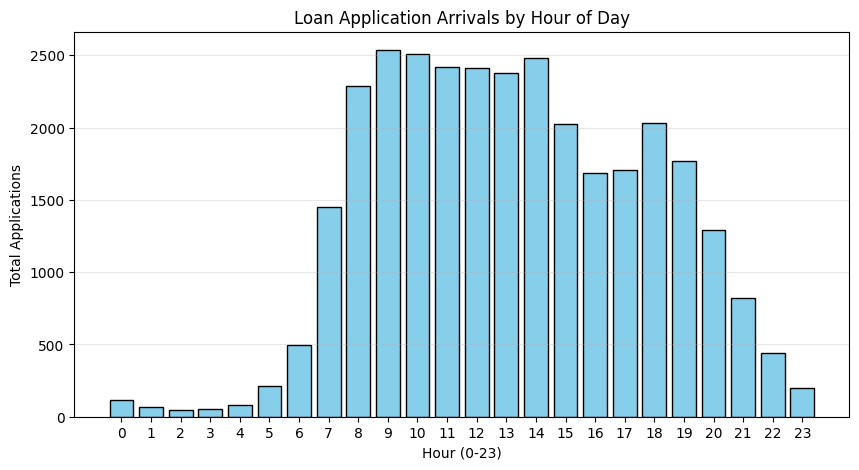

In [9]:
import matplotlib.pyplot as plt

# 1. Extract the "Hour" from the timestamp
arrivals['hour'] = arrivals['time:timestamp'].dt.hour

# 2. Count arrivals per hour
hourly_counts = arrivals.groupby('hour').size()

# 3. Visualize
plt.figure(figsize=(10, 5))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', edgecolor='black')
plt.title("Loan Application Arrivals by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Total Applications")
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()

In [10]:
# 1. Calculate the timespan of your log (How many days does the data cover?)
total_days = (arrivals['time:timestamp'].max() - arrivals['time:timestamp'].min()).days

# 2. Calculate the average number of arrivals per hour
# This gives you: "On a typical day, 15 applications arrive at 9 AM"
hourly_avg = hourly_counts / total_days

# 3. Convert to Lambda (Arrivals per Second) for that specific hour
# We divide by 3600 because there are 3600 seconds in an hour.
lambda_schedule = hourly_avg / 3600

print("--- Hourly Spawn Rate Schedule (Lambda) ---")
print(lambda_schedule.head(24)) # Print morning hours

--- Hourly Spawn Rate Schedule (Lambda) ---
hour
0     0.000086
1     0.000051
2     0.000035
3     0.000043
4     0.000061
5     0.000162
6     0.000377
7     0.001103
8     0.001742
9     0.001930
10    0.001910
11    0.001840
12    0.001837
13    0.001808
14    0.001887
15    0.001540
16    0.001285
17    0.001299
18    0.001544
19    0.001348
20    0.000982
21    0.000626
22    0.000334
23    0.000151
dtype: float64


In [11]:
# 1. Extract Weekday and Hour
# .dt.weekday gives 0=Monday, 1=Tuesday, ... 6=Sunday
arrivals['weekday'] = arrivals['time:timestamp'].dt.weekday
arrivals['hour'] = arrivals['time:timestamp'].dt.hour

# 2. Count Arrivals for every (Weekday, Hour) combination
# Example result: (Monday, 9) -> 500 arrivals
weekly_counts = arrivals.groupby(['weekday', 'hour']).size()

# 3. Normalize: We need 'Arrivals per Hour', not 'Total Arrivals'
# We must count how many 'Mondays', 'Tuesdays' etc. are in the dataset.
# (e.g., if data covers 2 weeks, we divide Monday counts by 2)
unique_days = arrivals['time:timestamp'].dt.date.nunique()
approx_weeks = unique_days / 7  # Simple approximation for assignment
# For higher precision, you'd count exact occurrences of each weekday in the dataset range.

# Average arrivals per hour
hourly_avg_weekly = weekly_counts / approx_weeks

# 4. Convert to Lambda (Arrivals per Second)
# This is your final lookup table
lambda_schedule_weekly = hourly_avg_weekly / 3600

print("--- Sample of Weekly Schedule (Monday Mornings) ---")
# Accessing Monday (0) at 9 AM (9)
print(f"Monday 9AM Rate: {lambda_schedule_weekly.get((0, 9), 0.0):.5f}")

--- Sample of Weekly Schedule (Monday Mornings) ---
Monday 9AM Rate: 0.00283


In [12]:
print(lambda_schedule_weekly)

weekday  hour
0        0       0.000085
         1       0.000058
         2       0.000032
         3       0.000043
         4       0.000048
                   ...   
6        19      0.001009
         20      0.000903
         21      0.000558
         22      0.000287
         23      0.000096
Length: 168, dtype: float64


In [13]:
import random

# Convert your pandas result to a standard Python dictionary
# Format: {(Day, Hour): Rate}  e.g., {(0, 9): 0.025}
schedule_dict = lambda_schedule_weekly.to_dict()

def get_weekly_dynamic_wait_time(current_sim_time):
    # 1. Determine Context (Day of Week and Hour)
    # 86400 seconds in a day
    day_index = int((current_sim_time // 86400) % 7)  # 0=Mon, 6=Sun
    hour_index = int((current_sim_time % 86400) // 3600) # 0-23
    
    # 2. Look up the rate
    # Use .get() with a tiny default value for nights/weekends with no data
    current_lambda = schedule_dict.get((day_index, hour_index), 0.000001)
    
    # 3. Generate Randomness
    if current_lambda <= 0.000001:
         # If it's basically zero (e.g., Sunday 3AM), wait a full hour
         return 3600 
         
    return random.expovariate(current_lambda)

# --- Test the Logic ---
# Let's test "Monday 9 AM" (Start of sim + 9 hours)
sim_time_mon_9am = 0 + (9 * 3600) 
wait = get_weekly_dynamic_wait_time(sim_time_mon_9am)
print(f"Monday 9 AM wait time: {wait:.2f} seconds")

# Let's test "Sunday 3 AM" (6 days + 3 hours)
sim_time_sun_3am = (6 * 86400) + (3 * 3600)
wait = get_weekly_dynamic_wait_time(sim_time_sun_3am)
print(f"Sunday 3 AM wait time: {wait:.2f} seconds")

Monday 9 AM wait time: 1444.39 seconds
Sunday 3 AM wait time: 16118.20 seconds


In [14]:
import pandas as pd

# 1. Setup: Get the total number of weeks in your data
# We use the full timespan of the log to ensure we capture the silent periods
total_time_span = df['time:timestamp'].max() - df['time:timestamp'].min()
total_weeks = total_time_span.total_seconds() / (7 * 24 * 3600)

print(f"Dataset covers approximately {total_weeks:.2f} weeks.")

# 2. Group by Weekday and Hour
# We count how many applications happened in total for every slot
# 0=Monday, 6=Sunday
arrivals['weekday'] = arrivals['time:timestamp'].dt.weekday
arrivals['hour'] = arrivals['time:timestamp'].dt.hour
counts = arrivals.groupby(['weekday', 'hour']).size()

# 3. Calculate the TRUE Arrival Rate (Lambda)
# Formula: (Total Arrivals in this slot) / (Total Seconds usually available in this slot)
# Each specific hour slot (e.g. Mon 9-10am) happens once per week.
# So the total time available for "Mon 9am" is: 3600 seconds * Number of Weeks
seconds_per_slot = 3600 * total_weeks

lambda_schedule_weekly = counts / seconds_per_slot

# 4. Fill in the missing zeros!
# If NO applications ever arrived on Sunday 4 AM, 'counts' won't have that row.
# We must reindex to ensure all 168 hours (7 days * 24 hours) exist.
full_index = pd.MultiIndex.from_product([range(7), range(24)], names=['weekday', 'hour'])
lambda_schedule_weekly = lambda_schedule_weekly.reindex(full_index, fill_value=0.0000001)

# --- VERIFICATION ---
print("\n--- Corrected Wait Times (Predictions) ---")

# Check Monday 9 AM (Day 0, Hour 9)
rate_mon = lambda_schedule_weekly.loc[(0, 9)]
wait_mon = 1 / rate_mon if rate_mon > 0.000001 else 999999
print(f"Monday 9 AM Rate: {rate_mon:.5f} -> Avg Wait: {wait_mon:.0f} seconds")

# Check Sunday 3 AM (Day 6, Hour 3)
rate_sun = lambda_schedule_weekly.loc[(6, 3)]
wait_sun = 1 / rate_sun if rate_sun > 0.000001 else 999999
print(f"Sunday 3 AM Rate: {rate_sun:.5f} -> Avg Wait: {wait_sun:.0f} seconds")

Dataset covers approximately 56.74 weeks.

--- Corrected Wait Times (Predictions) ---
Monday 9 AM Rate: 0.00261 -> Avg Wait: 383 seconds
Sunday 3 AM Rate: 0.00003 -> Avg Wait: 29181 seconds


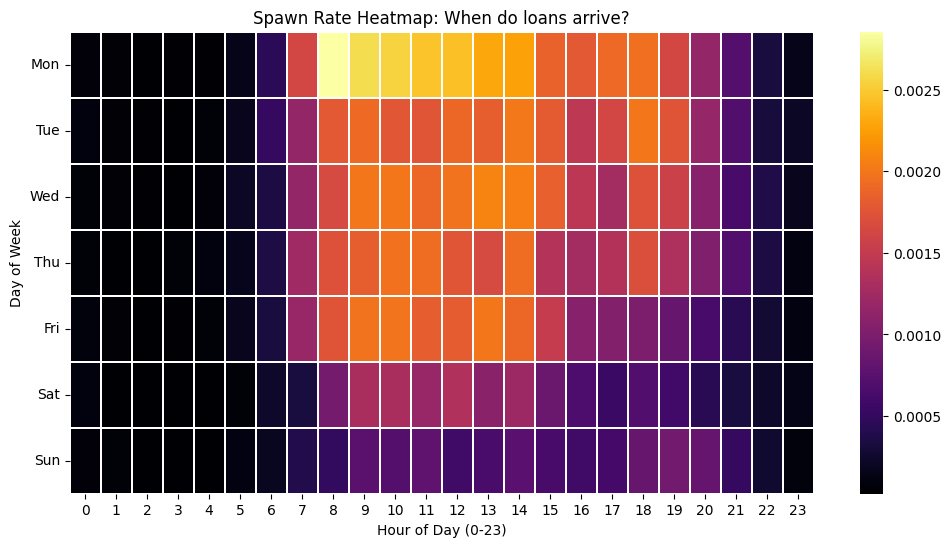

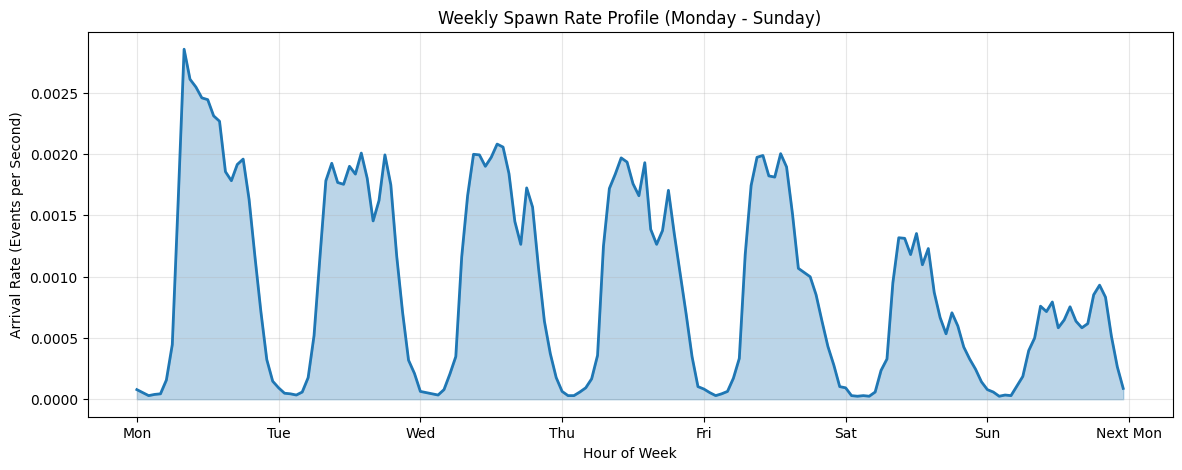

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your schedule is filled for all hours (7 days * 24 hours = 168 rows)
# If you haven't done the reindexing step yet:
full_index = pd.MultiIndex.from_product([range(7), range(24)], names=['weekday', 'hour'])
lambda_schedule_filled = lambda_schedule_weekly.reindex(full_index, fill_value=0.0)

# --- PLOT 1: THE HEATMAP ---
# Transform the data into a 7x24 matrix
heatmap_matrix = lambda_schedule_filled.unstack(level='hour')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_matrix, cmap="inferno", linewidths=0.05)
plt.title("Spawn Rate Heatmap: When do loans arrive?")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Day of Week")
# Replace 0,1,2... with Mon,Tue...
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], 
           ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

# --- PLOT 2: THE WEEKLY RHYTHM (Line Chart) ---
plt.figure(figsize=(14, 5))
# Flatten the data to a simple list of 168 numbers
flat_rates = lambda_schedule_filled.values

plt.plot(flat_rates, color='#1f77b4', linewidth=2)
plt.fill_between(range(168), flat_rates, color='#1f77b4', alpha=0.3)

plt.title("Weekly Spawn Rate Profile (Monday - Sunday)")
plt.xlabel("Hour of Week")
plt.ylabel("Arrival Rate (Events per Second)")
plt.grid(True, alpha=0.3)

# Add clear Day markers on x-axis
day_ticks = [i * 24 for i in range(8)]
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Next Mon']
plt.xticks(day_ticks, day_labels)

plt.show()

In [16]:
print(schedule_dict)

{(0, 0): 8.500303582270796e-05, (0, 1): 5.843958712811172e-05, (0, 2): 3.187613843351548e-05, (0, 3): 4.250151791135398e-05, (0, 4): 4.7814207650273224e-05, (0, 5): 0.00017000607164541592, (0, 6): 0.0004834547662416515, (0, 7): 0.0017585003035822707, (0, 8): 0.003097298117789921, (0, 9): 0.0028316636308439586, (0, 10): 0.0027625986642380086, (0, 11): 0.002666970248937462, (0, 12): 0.0026510321797207042, (0, 13): 0.0025075895567698847, (0, 14): 0.0024597753491196112, (0, 15): 0.002013509411050395, (0, 16): 0.001933819064966606, (0, 17): 0.0020772616879174257, (0, 18): 0.002125075895567699, (0, 19): 0.0017691256830601092, (0, 20): 0.0012591074681238617, (0, 21): 0.0007756527018822102, (0, 22): 0.0003506375227686703, (0, 23): 0.0001593806921675774, (1, 0): 0.0001009411050394657, (1, 1): 5.312689738919247e-05, (1, 2): 4.7814207650273224e-05, (1, 3): 3.7188828172434734e-05, (1, 4): 6.375227686703097e-05, (1, 5): 0.0001912568306010929, (1, 6): 0.0005631451123254402, (1, 7): 0.001259107468123